# Project 2：NASA Data Acquisation, Visualization, and Analysis

In [68]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the NASA API and Data Collection

- Register for a NASA API key and understand the different types of data that the API provides.
- Run the Python script below to fetch data about **Near Earth Objects (NEOs)** from the NASA API for a years data.
- Extract and understand the different pieces of data provided for each NEO.

In [69]:
import requests
import pandas as pd
import time
from datetime import datetime, timedelta
from getpass import getpass

# Set your NASA API KEY, this step asks you to enter your API KEY.
# (The input box may be float in the top on your editor.)
#api_key = getpass()

In [70]:
import json

use_data_from_local_file = True
num_days = 367

In [71]:
# This code block for fetching data from api, see use_data_from_local_file bool
'''
# Set the start and end dates for the data you want to fetch
start_date = datetime.strptime('2022-01-01', '%Y-%m-%d')
end_date = start_date + timedelta(days=num_days)  # 1 year later
# change above to full year!
# Initialize a list to store the data
data = []

# Fetch data from the NASA API 7 days at a time
# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"
# You can look into the example query in the link below to see what the data look like:
# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY
current_date = start_date
while current_date < end_date and use_data_from_local_file == False:
    next_date = min(current_date + timedelta(days=7), end_date)
    # print("Current date: ", current_date)
    # print("Next date: ", next_date)
    response = requests.get(f'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strftime("%Y-%m-%d")}&api_key={api_key}')
    data.append(response.json())
    current_date = next_date
    time.sleep(1)  # To avoid hitting the rate limit
'''
# Now 'data' contains the NEO data for the 1-year period

'\n# Set the start and end dates for the data you want to fetch\nstart_date = datetime.strptime(\'2022-01-01\', \'%Y-%m-%d\')\nend_date = start_date + timedelta(days=num_days)  # 1 year later\n# change above to full year!\n# Initialize a list to store the data\ndata = []\n\n# Fetch data from the NASA API 7 days at a time\n# The introduction of the API is on https://api.nasa.gov, under "Browse APIs" -> "Asteroids NeoWs"\n# You can look into the example query in the link below to see what the data look like:\n# https://api.nasa.gov/neo/rest/v1/feed?start_date=2015-09-07&end_date=2015-09-08&api_key=DEMO_KEY\ncurrent_date = start_date\nwhile current_date < end_date and use_data_from_local_file == False:\n    next_date = min(current_date + timedelta(days=7), end_date)\n    # print("Current date: ", current_date)\n    # print("Next date: ", next_date)\n    response = requests.get(f\'https://api.nasa.gov/neo/rest/v1/feed?start_date={current_date.strftime("%Y-%m-%d")}&end_date={next_date.strft

In [72]:
# This code block for fetching data from local file, see use_data_from_local_file bool
if use_data_from_local_file == True:
    f = open('20_weeks.json')
    data = json.load(f)

In [73]:
# Check the date coverage of your data.
print("Number of days of data used: ", num_days)
print("Number of weeks of data used:", len(data))

neo_data = []
for d in data:
   neo_data += list(d['near_earth_objects'].keys())

# Remove duplicates using a set
neo_data = list(set(neo_data))

# Sort the dates
neo_data.sort()


print(sorted(neo_data))

Number of days of data used:  367
Number of weeks of data used: 53
['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03

In [74]:
# save out data to json file 
# with open("26_weeks.json", "w") as outfile:
#     json.dump(data, outfile)

'# save out data to json file \nwith open("data.json", "w") as outfile:\n    json.dump(data, outfile)'

In [75]:
from src.utils import get_a_random_chunk_property

In [62]:
get_a_random_chunk_property(data)

date: 2022-11-11
NEO name: (2021 VX22)
name: (2021 VX22)


For the remaining tasks, you have to organize the data as pd.DataFrame so as to suit the specific need in each task. This part may require a considerably amount of efforts, which is normal in data science and analytics works.

### Task 2: Data Analysis

- Calculate the average size of the NEOs for each day.
- Determine the proportion of NEOs that are potentially hazardous.
- Find the NEO with the closest approach distance for each day.
- Use statistical methods to analyze the data. For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. Determine if the size of a NEO is correlated with whether it is potentially hazardous.

In [76]:
# Write your code
import pandas as pd

In [84]:

## Data was as list and here we convert the data list into a dictionary:

data_dict = {}
#print(len(data))
for item in data:
    for date, neos in item['near_earth_objects'].items():
        if date not in data_dict:
            data_dict[date] = []
        data_dict[date].extend(neos)

# To check the date coverage of the data.
dates_contained_in_data = list(data_dict.keys())


average_sizes = calculate_average_neo_size(data_dict)

# Convert the dictionary to a DataFrame
average_size_df = pd.DataFrame.from_dict(average_sizes, orient='index', columns=['average_size'])

# Sort the DataFrame by date if needed
average_size_df = average_size_df.sort_index()

# enumerate for index
# average_size_df = average_size_df.reset_index(names='date')

# Print the DataFrame
print(average_size_df)

            average_size
2022-01-01    164.069506
2022-01-02    113.283811
2022-01-03     28.178929
2022-01-04     80.179344
2022-01-05    177.148967
...                  ...
2022-12-29    188.916640
2022-12-30    137.482136
2022-12-31     52.291388
2023-01-01    305.094598
2023-01-02    183.898691

[367 rows x 1 columns]


In [93]:
# - Determine the proportion of NEOs that are potentially hazardous.
# - Find the NEO with the closest approach distance for each day.

#from glom import glom, Flatten, Inspect

# data is a list of dicts containing json response data
# DATA TYPE: <class 'list'>
# DATA0 TYPE: <class 'dict'>
# NEO TYPE: <class 'dict'>
# DATE VALUE TYPE: <class 'list'> of dicts
# INDEX TYPE <class 'tuple'>
# write down what data types are needed!

tempval = False # for testing using just one day of data

# lists to be converted into dataframes
neo_entry_list = []
dangerous_list = []
total_hazardous_count = 0
total_non_hazardous_count = 0

for val in range(int(num_days/7)): # convert to num of weeks
    neo = data[val]['near_earth_objects']
    for neo_object in sorted(neo.items()):
        # print("Date:", neo_object[0])
        entry_date = neo_object[0]
        
        # close approach work
        expanded_neo_df = pd.json_normalize(neo, record_path=entry_date)
        expanded_approach_df = pd.json_normalize(neo[entry_date], 'close_approach_data', ['neo_reference_id', 'name', ['estimated_diameter', 'meters']])
        # if tempval == False:
        #     tempval = True
        min_val = expanded_approach_df['miss_distance.kilometers'].min() # string
        min_id = expanded_approach_df[expanded_approach_df['miss_distance.kilometers']==expanded_approach_df['miss_distance.kilometers'].min()]['neo_reference_id'] # pd series
        min_name = expanded_approach_df[expanded_approach_df['miss_distance.kilometers']==expanded_approach_df['miss_distance.kilometers'].min()]['name'] # pd series
        neo_single_entry_list = min_id.tolist() + min_name.tolist()

        neo_single_entry_list.append(min_val)
        neo_single_entry_list.insert(0, entry_date)
        neo_entry_list.append(neo_single_entry_list)

        # hazardous asteroid calculations
        non_hazardous_count = len(expanded_neo_df[expanded_neo_df['is_potentially_hazardous_asteroid']==False])
        # print("False:", non_hazardous_count)
        total_non_hazardous_count += non_hazardous_count

        hazardous_count = len(expanded_neo_df[expanded_neo_df['is_potentially_hazardous_asteroid']==True])
        # print("True:", hazardous_count)
        total_hazardous_count += hazardous_count

        dangerous_proportion = hazardous_count/non_hazardous_count
        dangerous_list.append([entry_date, dangerous_proportion])
        # print(" Dangerous:", df_dangerous_true)
        # print(" Non-dangerous:", df_dangerous_false)
        # print("     Proportion:", 100*df_dangerous_true/df_dangerous_false, "%")

# for reference only
# >>> json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

# note that initially the start and end of the week-long data is duplicated and one needs to be dropped
print(len(neo_entry_list))

neo_df = pd.DataFrame(neo_entry_list, columns=['date', 'neo id', 'neo name', 'dist'])
print("Pre-drop count:", len(neo_df))
neo_df = neo_df.drop_duplicates()
print("Post-drop count:", len(neo_df))
neo_df = neo_df.reset_index(drop=True)
neo_df = neo_df.set_index('date') # set index to date
neo_df.index.name = None # remove date label
print(neo_df)

dangerous_df = pd.DataFrame(dangerous_list, columns=['date', 'proportion'])
print("Pre-drop count:", len(dangerous_df))
dangerous_df = dangerous_df.drop_duplicates()
print("Post-drop count:", len(dangerous_df))
dangerous_df = dangerous_df.reset_index(drop=True)
dangerous_df = dangerous_df.set_index('date') # set index to date
dangerous_df.index.name = None # remove date label
print(dangerous_df)

display(neo_df.to_string())
display(dangerous_df.to_string())

# df = pd.DataFrame(data)
# df.describe()
# below just for reference
temp = {
    'links': {
        'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-08&end_date=2022-01-15&detailed=false&api_key=DEMO_KEY',
        'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-25&end_date=2022-01-01&detailed=false&api_key=DEMO_KEY',
        'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-08&detailed=false&api_key=DEMO_KEY'
    },
    'element_count': 125,
    'near_earth_objects': {
        '2022-01-07': [{
            'links': {
                'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=DEMO_KEY'
            },
            'id': '2216523',
            'neo_reference_id': '2216523',
            'name': '216523 (2001 HY7)',
            'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523',
            'absolute_magnitude_h': 20.7,
            'estimated_diameter': {
                'kilometers': {
                    'estimated_diameter_min': 0.1925550782,
                    'estimated_diameter_max': 0.4305662442
                },
                'meters': {
                    'estimated_diameter_min': 192.5550781879,
                    'estimated_diameter_max': 430.566244241
                },
                'miles': {
                    'estimated_diameter_min': 0.1196481415,
                    'estimated_diameter_max': 0.2675413778
                },
                'feet': {
                    'estimated_diameter_min': 631.7424027221,
                    'estimated_diameter_max': 1412.6189567557
                }
            },
            'is_potentially_hazardous_asteroid': True,
            'close_approach_data': [{
                'close_approach_date': '2022-01-07',
                'close_approach_date_full': '2022-Jan-07 06:54',
                'epoch_date_close_approach': 1641538440000,
                'relative_velocity': {
                    'kilometers_per_second': '13.0121884925',
                    'kilometers_per_hour': '46843.8785729622',
                    'miles_per_hour': '29106.9644388498'
                },
                'miss_distance': {
                    'astronomical': '0.3880911625',
                    'lunar': '150.9674622125',
                    'kilometers': '58057611.275823875',
                    'miles': '36075326.811664475'
                },
                'orbiting_body': 'Earth'
            }],
            'is_sentry_object': False
        }]
    }
}
# print("TEMP TYPE:", type(temp))

# new_df = pd.concat([pd.DataFrame(pd.json_normalize(x)) for x in df['near_earth_objects']],ignore_index=True)
# print(new_df)

160
Pre-drop count: 160
           date    neo id     neo name                dist
0    2022-01-01  54235537   (2022 AF2)  12431720.253045725
1    2022-01-02  54235525   (2022 AP1)    180597.061908216
2    2022-01-03  54235674   (2022 AZ2)   1966661.216022021
3    2022-01-04  54338714    (2023 AW)  17810689.136848906
4    2022-01-05  54243529  (2022 AV13)    109480.269041248
..          ...       ...          ...                 ...
155  2022-05-17  54225725    (2021 XE)  17161746.128050199
156  2022-05-18  54278312   (2022 JF1)  12483858.222376421
157  2022-05-19  54278102    (2022 JH)  12674486.763934718
158  2022-05-20   3841718   (2019 JU1)   15186242.87008268
159  2022-05-21  54276657   (2022 HN2)  10818317.113514932

[160 rows x 4 columns]
Post-drop count: 141
           date    neo id     neo name                dist
0    2022-01-01  54235537   (2022 AF2)  12431720.253045725
1    2022-01-02  54235525   (2022 AP1)    180597.061908216
2    2022-01-03  54235674   (2022 AZ2)   19666

'           date    neo id      neo name                dist\n0    2022-01-01  54235537    (2022 AF2)  12431720.253045725\n1    2022-01-02  54235525    (2022 AP1)    180597.061908216\n2    2022-01-03  54235674    (2022 AZ2)   1966661.216022021\n3    2022-01-04  54338714     (2023 AW)  17810689.136848906\n4    2022-01-05  54243529   (2022 AV13)    109480.269041248\n5    2022-01-06  54103879     (2021 AA)  20162466.582320337\n6    2022-01-07  54245818    (2022 CO3)  10592070.949726418\n7    2022-01-08   3795086    (2017 YQ5)  22743640.513285464\n8    2022-01-09  54235475    (2022 AG1)  13440624.295297815\n9    2022-01-10  54236586    (2022 AY5)    102192.459206328\n10   2022-01-11  54236432    (2022 AD4)   1117455.293560851\n11   2022-01-12   3797456    (2018 AN2)  15773090.047012437\n12   2022-01-13  54235538    (2022 AG2)   1212342.769096783\n13   2022-01-14  54236431    (2022 AA4)    1392857.29786012\n14   2022-01-15  54236430    (2022 AY3)  12335227.248289592\n15   2022-01-16  542383

'           date  proportion\n0    2022-01-01    0.150000\n1    2022-01-02    0.000000\n2    2022-01-03    0.000000\n3    2022-01-04    0.125000\n4    2022-01-05    0.153846\n5    2022-01-06    0.111111\n6    2022-01-07    0.285714\n7    2022-01-08    0.083333\n8    2022-01-09    0.000000\n9    2022-01-10    0.153846\n10   2022-01-11    0.000000\n11   2022-01-12    0.050000\n12   2022-01-13    0.052632\n13   2022-01-14    0.133333\n14   2022-01-15    0.125000\n15   2022-01-16    0.058824\n16   2022-01-17    0.200000\n17   2022-01-18    0.142857\n18   2022-01-19    0.250000\n19   2022-01-20    0.157895\n20   2022-01-21    0.000000\n21   2022-01-22    0.076923\n22   2022-01-23    0.105263\n23   2022-01-24    0.235294\n24   2022-01-25    0.357143\n25   2022-01-26    0.058824\n26   2022-01-27    0.266667\n27   2022-01-28    0.000000\n28   2022-01-29    0.000000\n29   2022-01-30    0.125000\n30   2022-01-31    0.153846\n31   2022-02-01    0.000000\n32   2022-02-02    0.200000\n33   2022-02-

In [117]:
# - Use statistical methods to analyze the data. 
# For example, calculate the mean, median, mode, and standard deviation of the NEO sizes. 
# Determine if the size of a NEO is correlated with whether it is potentially hazardous.

import statistics
import numpy as np


result = analyze_neo_data(data)
print(json.dumps(result, indent=4))

{
    "mean_size": 130.82037618111193,
    "median_size": 64.42302747615,
    "mode_size": 35.8129403019,
    "std_dev": 181.05382462489058,
    "correlation": 0.3572023125645341,
    "hazardous_neo_sizes": [
        676.1452147577,
        303.4170480479,
        317.7166529762,
        676.1452147577,
        446.7247132921,
        300.6353038309,
        303.4170480479,
        317.7166529762,
        320.6564489709,
        337.3183589129,
        337.3183589129,
        307.6379996423,
        559.8091320902,
        303.4170480479,
        284.4722965033,
        320.6564489709,
        337.3183589129,
        316.2568775553,
        287.1044862548,
        358.1294030194,
        459.2402860401,
        358.1294030194,
        323.623446563,
        542.0507863358,
        247.7650126055,
        338.8753497147,
        364.7875257245,
        401.8277992159,
        361.4431335863,
        251.2117672679,
        594.3468684194,
        235.5266086831,
        567.5968528656,


### Task 3: Data Visualization Part A

- Create a line plot of the number of NEOs per week.
- Create a histogram of the distribution of NEO sizes.
- Create a bar plot of the average NEO size per week.
- Use a library like Seaborn to create more complex visualizations, such as a box plot of the NEO sizes or a heat map of the number of NEOs per week. **Be creative**!

In [84]:
# Write your code

### Task 4: Data Visualization Part B

- Create a pie chart of the proportion of hazardous vs non-hazardous NEOs.
- Create a scatter plot of the correlation between NEO size and close approach distance.
- Customize the appearance of your plots (e.g., colors, labels, titles).
- Create interactive visualizations using a library like Plotly. For example, create an interactive scatter plot where you can hover over each point to see more information about the NEO. **Be creative!**

total_hazardous_count 123
total_non_hazardous_count 2569


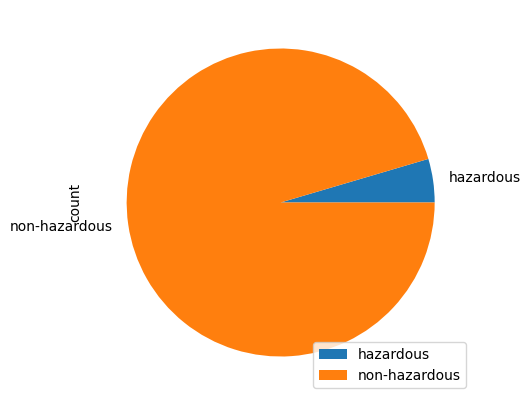

In [80]:
# Write your code
print("total_hazardous_count", total_hazardous_count)
print("total_non_hazardous_count", total_non_hazardous_count)
hazardous_df = pd.DataFrame({'count': [total_hazardous_count, total_non_hazardous_count]}, index=['hazardous', 'non-hazardous'])
hazardous_plot = hazardous_df.plot.pie(y='count', figsize=(5,5))

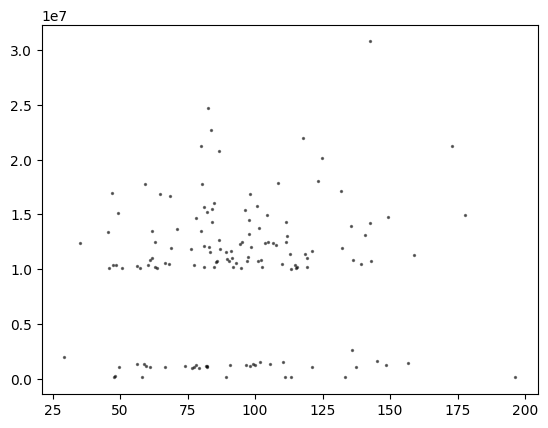

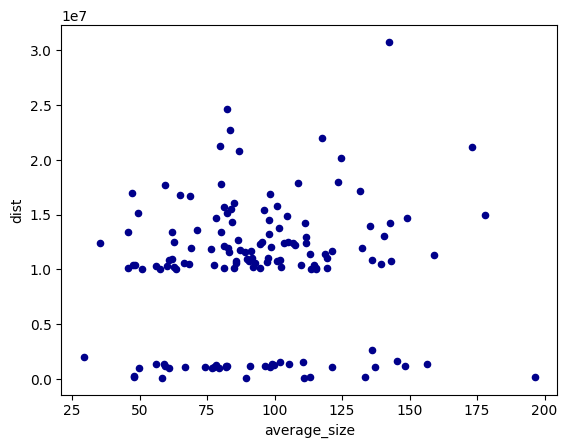

In [116]:
import matplotlib.pyplot as plt

only_approach_df = neo_df['dist']
# print(average_size_df)
# print(only_approach_df)

both_frames = average_size_df.join(only_approach_df)
both_frames['dist'] = both_frames['dist'].astype(float) # convert to float, otherwise object won't work
# print(both_frames)

fig, ax = plt.subplots()

# two methods
ax1 = both_frames.plot.scatter(x='average_size', y='dist', c='DarkBlue')
ax.scatter(both_frames['average_size'].to_numpy(), both_frames['dist'].to_numpy(), s=2, c='black', alpha=0.5)

### Task 5: Interpretation of Results

- Interpret the results of your data visualization in part A and B. 
- What insights can you gain about NEOs from your results? Summarizing your findings.
- Use your findings to make predictions or recommendations. For example, if you found that larger NEOs are more likely to be potentially hazardous, you could recommend that more resources be allocated to tracking large NEOs. **Be creative!**
- Identify, understand, and explain one scientific paper, on a clustering or classification method of relevance that could help Task 5. You don't have to implement it, you just need to justify in this notebook why the method in the scientific paper could contribute in analysis or interpretation of the results.

In [86]:
# Write your code

### Task 6: Presentation and Documentation

- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This should include an overview of your work, the results of your data analysis, and the insights you gained from your results.